### <font color='Orange'>Classifying Iris Species</font> 

    References
    
    1. Introduction to Machine Learning with Python A Guide for Data Scientists (Andreas C. Müller, Sarah Guido)
    2. https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82
    3. https://www.statology.org/standardize-data-python/#:~:text=To%20standardize%20a%20dataset%20means,the%20standard%20deviation%20is%201.


### <font color='Orange'> Introduction </font>

Because we have measurements for which we know the correct species of iris, this is a <font color='Orange'>supervised learning problem.</font>In this problem, we want to predict one of several options (the species of iris). This is an example of a classification problem. The possible outputs (different species of irises) are called <font color='Orange'> classes.</font> Every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem. The desired output for a single data point (an iris) is the species of this flower. For a particular data point, the species it belongs to is called its label.

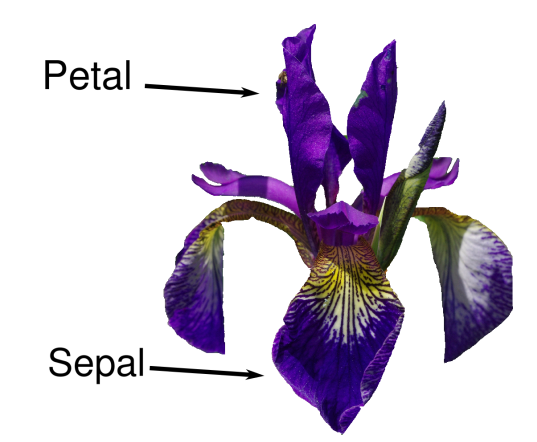

### <font color='Orange'> Meet the data </font>

The data we will use for this example is the Iris dataset, a classical dataset in machine
learning and statistics. It is included in scikit-learn in the datasets module. We
can load it by calling the load_iris function:

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

Load the data trough load_iris imported from sklearn.datasets.load_iris(*, return_X_y=False, as_frame=False)

That's why we imported as in [from sklearn.datasets] >>>>>>>> [import load_iris]

In [12]:
iris_dataset = load_iris()

In [57]:
#Prints the title of the data like we have access to  columns in pandas
iris_dataset.keys()

#This one's the same thing as the above
#print("{}".format(iris_dataset.keys()))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
# Like in pandas
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
# Note that there are two types of accessing columns of data through the dot and square bracket
def print_data(name):
    return iris_dataset[name]

In [34]:
# Try to see each data ranging from 'data to data_module'
print_data('target_names')

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
# The rows in the data array correspond to flowers, while the columns represent the four measurements that were taken for each flower
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [36]:
len(iris_dataset.data)

150

### <font color='Orange'> NB </font>

We see that the array contains measurements for 150 different flowers. Remember that the individual items are called <font color='Orange'> samples </font> in machine learning, and their properties are called <font color='Orange'> features </font>. The shape of the data array is the number of samples multiplied by the number of features(rows x columns == samples x features). This is a convention in scikit-learn, and your data will always be assumed to be in this shape

In [37]:
iris_dataset.data.shape

(150, 4)

In [38]:
# for each flower type, we'll have 4 columns with the following features
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
# 1st col : sepal length
# 2nd col : sepal width
# 3rd col : petal length
# 4th col :  petal width

# Measurement = cm

# from the data below, all the samples have the same petal width = 0.2
# 5.1 is the max sepal length and e.t.c
iris_dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [40]:
# The meanings of the numbers are given by the iris target_names array:0 means setosa, 1 means versicolor, and 2 means virginica.
print_data('target'), print_data('target_names')

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [57]:
# Convert the data into DataFrame as it's easier to manipulate them using pandas
df_data = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
df_target = pd.DataFrame(iris_dataset.target, columns=['targets'])
df_target

,targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### <font color='Orange'>Exploratory Data Analysis (EDA)</font>

In [53]:
# To help us understand our data better, let’s first combine the two data frames we just created. 
# By doing this we can see the features and class determination of the flowers together.
df = pd.concat([df_data, df_target], axis = 1)
df

,sepal_length,sepal_width,petal_length,petal_width,targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### <font color='Orange'>Data cleaning</font>

<font color='Orange'>1. Data types</font>

In [87]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_width     float64
petal_length    float64
targets           int32
dtype: object

<font color='Orange'>2. Checking for missing values</font>

In [185]:
# No missing values for this data
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_width     0
petal_length    0
targets         0
dtype: int64

<font color='Orange'>3. Statistical Overview</font>

This allows us to get a quick overview of the data. We can check for outliers by looking at the min and max values of each column in relation to the mean. Spend a bit of time looking through this chart to begin understanding the spread of the data.

In [93]:
df.describe()

,sepal_length,sepal_width,petal_width,petal_length,targets
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [94]:
df.corr()

,sepal_length,sepal_width,petal_width,petal_length,targets
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_width,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_length,0.817941,-0.366126,0.962865,1.000000,0.956547
targets,0.782561,-0.426658,0.949035,0.956547,1.000000


<font color='Orange'>4. Visual representation</font>

Petal length and width is most correlated with the target, meaning that as these numbers increase, so does the target value. In this case, it means that flowers in class 2 often have longer petal length and width than flowers in class 0. Sepal width is most anti-correlated, indicating that flowers in class 0 have the greatest sepal width than those in class 2. We can also see some intercorrelation between features, for example petal width and length are also highly correlated. This information is not necessarily the best way to analyze the data, but it allows us to start seeing these relationships.

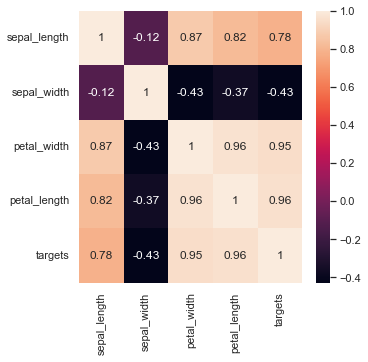

In [108]:
# making use of seaborn library, usually more used than matplotlib especially for statistical observation 
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(df.corr(), annot = True); #annot = True adds the numbers onto the squares

In [169]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [211]:
def scatter_plot(x_index, y_index):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: iris_dataset.target_names[int(i)])
    plt.figure(figsize=(5, 4))
    #Accessing each column through their user-specified indices, c controls the color
    plt.scatter(iris_dataset.data[:, x_index], iris_dataset.data[:, y_index], c=iris_dataset.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_dataset.feature_names[x_index])
    plt.ylabel(iris_dataset.feature_names[y_index])
    plt.tight_layout()
    plt.show()

C:\Users\adema\AppData\Local\Temp\ipykernel_1412\4059776167.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=[0, 1, 2], format=formatter)


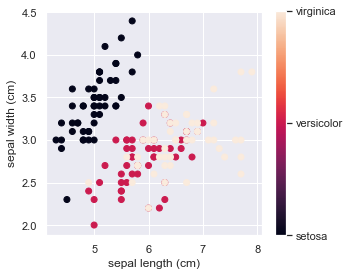

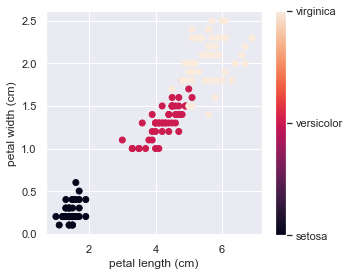

In [216]:
# The indices of the features that we are plotting (class 0 & 1) and (class 2 & 3)
scatter_plot(0,1)
scatter_plot(2,3)

### <font color='Orange'> Modelling</font> 

Now that we have cleaned and explored the data, we can begin to develop a model. Our goal is to create a Logistic Regression classification model that will predict which class the flower is based on petal and sepal sizes.

In [215]:
#divide our data into predictors (X) and target values (y)
X = df.copy()
y = X.pop('targets')

### <font color='Orange'> Measuring Success: Training and Testing Data </font> 

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements. But before we can apply our model to new measurements, we need to know whether it actually works—that is, whether we should trust its predictions. 

Unfortunately, we cannot use the data we used to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. This “remembering” does not indicate to us whether our model will generalize well (in other words, whether it will also perform well on new data).

scikit-learn contains a function that shuffles the dataset and splits it for you: <font color='Orange'> the train_test_split function.</font> This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set. 

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics, where x is the input to a function and y is the output. Following more conventions from mathematics, we use a capital X because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector). Let’s call train_test_split on our data and assign the outputs using this nomenclature:

<font color='Orange'> 1. Train test split</font> 

Once we separate the features from the target, we can create a train and test class. As the names suggest, we will train our model on the train set, and test the model on the test set. 

In [200]:
from sklearn.model_selection import train_test_split

<img src ="./images/train_test_split.png" width="800" height="800">

First, make sure your data is arranged into a format acceptable for train test split. In scikit-learn, this consists of separating your full dataset into Features and Target. <font color='Orange'> ( Have a look at the image above )</font> 


Next, split the dataset into two pieces: a training set and a testing set. This consists of random sampling without replacement  about 75% (you can vary this) of the rows and putting them into your training set and putting the remaining 25% to your test    set. Note that the colors in “Features” and “Target” indicate where their data will go (“X_train”, “X_test”, “y_train”,          “y_test”) for a particular train test split.

Afterwards, train the model on the training set. This is “X_train” and “y_train” in the image.

Finally, test the model on the testing set (“X_test” and “y_test” in the image) and evaluate the performance.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify = y)

# To be explained clearly
#by stratifying on 'y' we assure that the different classes are represented proportionally to the amount in the total data 
#(this makes sure that all of class 1 is not in the test group only)

<font color='Orange'> 2. Standardize</font> 

Is also called Z-Score Normalization which refers to the transformation of features by subtracting from mean and dividing by standard deviation.

To standardize a dataset means to scale all of the values in the dataset such that the <font color='Orange'>mean value is 0 and the standard deviation is 1.</font>This puts the numbers on a consistent scale while keeping the proportional relationship between them.

Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model. The images below represent data before and after normalization.

<img src ="./images/Normalization.png" width="400" height="400">

Ref : https://www.educative.io/edpresso/data-normalization-in-python

In [217]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_train

,sepal_length,sepal_width,petal_width,petal_length
0,0.649151,0.062366,0.975270,0.781662
1,-0.895234,1.459374,-1.256196,-1.031424
2,0.530352,-0.636138,0.752124,0.393144
3,2.193535,-0.170468,1.309990,1.429193
4,0.649151,-0.403303,0.305830,0.134131
...,...,...,...,...
107,0.292754,-1.101807,1.031057,0.263638
108,-1.014033,0.993705,-1.200409,-0.772412
109,-0.182441,-0.170468,0.250044,0.004625
110,-1.132832,1.226540,-1.311983,-1.419943


In [258]:
xi = float(df.sepal_length[0])
mean = float(df.describe()[1:2].sepal_length)
sd = float(df.describe()[2:3].sepal_length)

In [259]:
z = (xi - mean)/sd
z

-0.8976738791967661

In [ ]:
# currently working on this project !